# Analysis of the Labor Market in Data Science

Objective:
In this project, I clean, transform and process **Data Science job postings** from Glassdoor to extract meaningful insights.  

In [1]:
import pandas as pd
import re
import numpy as np

df = pd.read_csv("Uncleaned_DS_jobs.csv")
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [2]:
def convert_salary(salary):
    try:
        if not isinstance(salary, str) or salary.strip() == "":
            return None
        
        salary = salary.replace("$", "").replace("K", "").split('(')[0].strip()

        if "-" in salary:
            min_salary, max_salary = salary.split("-")
            min_salary = int(min_salary) * 1000
            max_salary = int(max_salary) * 1000
            return (min_salary + max_salary) // 2
        else:
            return int(salary) * 1000
        
    except Exception as e:
        print(f"Error processing salary: {salary}. Error: {e}")
        return None
df["Salary Estimate"] = df["Salary Estimate"].str.replace(r"\(Glassdoor est.\)", "", regex=True).str.strip() 
df["Average Salary"] = df["Salary Estimate"].apply(convert_salary)

print(df["Salary Estimate"].head())

0    $137K-$171K
1    $137K-$171K
2    $137K-$171K
3    $137K-$171K
4    $137K-$171K
Name: Salary Estimate, dtype: object


In [3]:
skill_list = ["Python", "Machine Learning", "SQL", "Excel", "AWS", "Spark", "Tableul", "Big Data", "Hadoop", "Java", "R"]

def extract_skill(description):
    found_skills = [skill for skill in skill_list if skill.lower() in description.lower()]
    return found_skills

df['Extracted Skills'] = df['Job Description'].apply(extract_skill)

df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Average Salary,Extracted Skills
0,0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",154000,"[Machine Learning, AWS, R]"
1,1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,154000,"[Machine Learning, SQL, Big Data, Hadoop, R]"
2,2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,154000,"[Python, Machine Learning, Excel, AWS, R]"
3,3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",154000,"[Python, Machine Learning, SQL, Excel, AWS, R]"
4,4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",154000,"[Python, Machine Learning, SQL, Excel, R]"


In [4]:
patterns = {
    "Entry-level": r"\b(entry[- ]?level|junior|no experience required|fresh graduate|0-1 years|associate)\b",
    "Mid-level": r"\b(mid[- ]?level|2-5 years|3-5 years| 2 years|intermediate|professional)\b",
    "Senior": r"\b(senior|5\+? years|experienced|5-8 years|7-10 years|lead|principal|manager)\b"
}

def extract_experience(description):
    experience = []
    for level, pattern in patterns.items():
        if re.search(pattern,description, re.IGNORECASE):
            experience.append(level)
    return experience if experience else ["Unknown"]

df["Experience Level"] = df['Job Description'].apply(extract_experience)

df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Average Salary,Extracted Skills,Experience Level
0,0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",154000,"[Machine Learning, AWS, R]",[Senior]
1,1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,154000,"[Machine Learning, SQL, Big Data, Hadoop, R]",[Unknown]
2,2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,154000,"[Python, Machine Learning, Excel, AWS, R]",[Unknown]
3,3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",154000,"[Python, Machine Learning, SQL, Excel, AWS, R]",[Mid-level]
4,4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",154000,"[Python, Machine Learning, SQL, Excel, R]",[Senior]


In [5]:
educationPatterns = {
    "Bachelor's": r"\b(bachelor|bachelor's degree|undergraduate degree)",
    "Master's": r"\b(master|master's degree|M.Sc|MSc|MS)",
    "PhD": r"\b(phd|ph.d|ph.d.|doctorate|doctoral degree)"
}

def extract_education(description):
    education = []
    for level, pattern in educationPatterns.items():
        if re.search(pattern, description, re.IGNORECASE):
            education.append(level)
    return education if education else ["Unknown"]

df["Education Level"] = df["Job Description"].apply(extract_education)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Average Salary,Extracted Skills,Experience Level,Education Level
0,0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",154000,"[Machine Learning, AWS, R]",[Senior],"[Bachelor's, Master's]"
1,1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,154000,"[Machine Learning, SQL, Big Data, Hadoop, R]",[Unknown],[Bachelor's]
2,2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,154000,"[Python, Machine Learning, Excel, AWS, R]",[Unknown],"[Master's, PhD]"
3,3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",154000,"[Python, Machine Learning, SQL, Excel, AWS, R]",[Mid-level],[Bachelor's]
4,4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",154000,"[Python, Machine Learning, SQL, Excel, R]",[Senior],[Unknown]


In [6]:
#df["Company Name"].sample(5)
df['Company Name'] = df["Company Name"].str.split("\n").str[0]
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Average Salary,Extracted Skills,Experience Level,Education Level
0,0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",154000,"[Machine Learning, AWS, R]",[Senior],"[Bachelor's, Master's]"
1,1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,154000,"[Machine Learning, SQL, Big Data, Hadoop, R]",[Unknown],[Bachelor's]
2,2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,154000,"[Python, Machine Learning, Excel, AWS, R]",[Unknown],"[Master's, PhD]"
3,3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",154000,"[Python, Machine Learning, SQL, Excel, AWS, R]",[Mid-level],[Bachelor's]
4,4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",154000,"[Python, Machine Learning, SQL, Excel, R]",[Senior],[Unknown]


In [7]:
#df["Location"].sample(5)
df["State"] = df["Location"].str.split(", ").str[-1]
df["City"] = df["Location"].str.split(", ").str[0]
df.head(50).sample(5)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Industry,Sector,Revenue,Competitors,Average Salary,Extracted Skills,Experience Level,Education Level,State,City
40,40,Data Analyst,$75K-$131K,Data Analyst\nLocation\n\n\nBoston\n\nBusiness...,3.1,"Cambridge Associates, LLC","Boston, MA","Boston, MA",501 to 1000 employees,1973,...,Investment Banking & Asset Management,Finance,$100 to $500 million (USD),-1,103000,"[Python, SQL, Excel, R]",[Senior],"[Bachelor's, Master's]",MA,Boston
5,5,Data Scientist,$137K-$171K,About Us:\n\nHeadquartered in beautiful Santa ...,4.2,HG Insights,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,...,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,154000,"[Python, Machine Learning, SQL, Excel, Spark, ...",[Mid-level],"[Master's, PhD]",CA,Santa Barbara
0,0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",154000,"[Machine Learning, AWS, R]",[Senior],"[Bachelor's, Master's]",NY,New York
42,42,Data Analyst I,$75K-$131K,Who is Cenlar?\n\nYou are.\n\nEmployee-owners ...,2.6,Cenlar,"Ewing, NJ","Ewing, NJ",1001 to 5000 employees,1958,...,-1,-1,$100 to $500 million (USD),-1,103000,"[SQL, R]","[Mid-level, Senior]",[Bachelor's],NJ,Ewing
44,44,Data Scientist,$75K-$131K,The Opportunity\n\nEversight is the recognized...,4.2,Eversight,"Palo Alto, CA","Palo Alto, CA",51 to 200 employees,2013,...,Enterprise Software & Network Solutions,Information Technology,$10 to $25 million (USD),-1,103000,"[Python, Machine Learning, R]",[Senior],[PhD],CA,Palo Alto


In [8]:
current_year = 2025
df["Age"] = current_year - df["Founded"]
df["Age"] = df["Age"].replace(current_year + 1)
df.head()

C:\Users\Gamer\AppData\Local\Temp\ipykernel_1936\3393025661.py:3: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df["Age"] = df["Age"].replace(current_year + 1)


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Sector,Revenue,Competitors,Average Salary,Extracted Skills,Experience Level,Education Level,State,City,Age
0,0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",154000,"[Machine Learning, AWS, R]",[Senior],"[Bachelor's, Master's]",NY,New York,32
1,1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,Business Services,$1 to $2 billion (USD),-1,154000,"[Machine Learning, SQL, Big Data, Hadoop, R]",[Unknown],[Bachelor's],VA,Chantilly,57
2,2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,...,Business Services,$100 to $500 million (USD),-1,154000,"[Python, Machine Learning, Excel, AWS, R]",[Unknown],"[Master's, PhD]",MA,Boston,44
3,3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",154000,"[Python, Machine Learning, SQL, Excel, AWS, R]",[Mid-level],[Bachelor's],MA,Newton,25
4,4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",154000,"[Python, Machine Learning, SQL, Excel, R]",[Senior],[Unknown],NY,New York,27


In [9]:
def standardize_company_size(size):
    if pd.isna(size) or size == '-1':
        return np.nan
    if '+' in size:
        size = size.replace('+', '-inf')
    size = re.sub(r'(\d+)\s+to\s+(\d+)', r'\1-\2', size)
    return size

df['Standardized Size'] = df['Size'].apply(standardize_company_size)

df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Revenue,Competitors,Average Salary,Extracted Skills,Experience Level,Education Level,State,City,Age,Standardized Size
0,0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",154000,"[Machine Learning, AWS, R]",[Senior],"[Bachelor's, Master's]",NY,New York,32,1001-5000 employees
1,1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,$1 to $2 billion (USD),-1,154000,"[Machine Learning, SQL, Big Data, Hadoop, R]",[Unknown],[Bachelor's],VA,Chantilly,57,5001-10000 employees
2,2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,...,$100 to $500 million (USD),-1,154000,"[Python, Machine Learning, Excel, AWS, R]",[Unknown],"[Master's, PhD]",MA,Boston,44,1001-5000 employees
3,3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",154000,"[Python, Machine Learning, SQL, Excel, AWS, R]",[Mid-level],[Bachelor's],MA,Newton,25,501-1000 employees
4,4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",154000,"[Python, Machine Learning, SQL, Excel, R]",[Senior],[Unknown],NY,New York,27,51-200 employees


In [10]:
def clean_revenue(revenue):
    try:
        if pd.isna(revenue) or revenue == '-1':
            return np.nan
    
        revenue = revenue.lower()
        numbers = re.findall(r'\d+\.?\d*', revenue)
        scale_factors = {'million': 1e6, 'billion': 1e9}

        scale = next((scale_factors[key] for key in scale_factors if key in revenue), None)
        if not scale or not numbers:
            return np.nan

        bounds = [float(num) * scale for num in numbers]

        return np.mean(bounds) if len(bounds) == 2 else (bounds[0] if bounds else np.nan)
    except Exception as e:
        return np.nan

df["Average Revenue"] = df['Revenue'].apply(clean_revenue)

def format_revenue(value):
    if pd.isna(value):
        return "Unknown"
    elif value >= 1e9:
        return f"{value / 1e9:.1f} billion"
    elif value >= 1e6:
        return f"{value / 1e6:.1f} million"
    else:
        return f"${value:,.0f}"
    
df['Formatted Revenue'] = df['Average Revenue'].apply(format_revenue)

df.head(30).sample(5)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Average Salary,Extracted Skills,Experience Level,Education Level,State,City,Age,Standardized Size,Average Revenue,Formatted Revenue
12,12,"Data Scientist - Statistics, Early Career",$137K-$171K,*Organization and Job ID**\nJob ID: 310918\n\n...,3.7,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,154000,"[Machine Learning, Excel, R]","[Entry-level, Mid-level, Senior]","[Master's, PhD]",WA,Richland,60,1001-5000 employees,2.505000e+08,250.5 million
0,0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,154000,"[Machine Learning, AWS, R]",[Senior],"[Bachelor's, Master's]",NY,New York,32,1001-5000 employees,NaN,Unknown
17,17,Data Scientist,$137K-$171K,Job Success Profile\n\nData Scientist\n\nBuckm...,3.5,Buckman,"Memphis, TN","Memphis, TN",1001 to 5000 employees,1945,...,154000,"[Python, Machine Learning, SQL, Hadoop, Java, R]",[Senior],"[Bachelor's, Master's, PhD]",TN,Memphis,80,1001-5000 employees,2.505000e+08,250.5 million
3,3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,154000,"[Python, Machine Learning, SQL, Excel, AWS, R]",[Mid-level],[Bachelor's],MA,Newton,25,501-1000 employees,3.000000e+08,300.0 million
6,6,Data Scientist / Machine Learning Expert,$137K-$171K,Posting Title\nData Scientist / Machine Learni...,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,...,154000,"[Python, Machine Learning, R]",[Unknown],[Master's],MA,Cambridge,29,10000-inf employees,1.000000e+10,10.0 billion


In [11]:
df['Number of Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' and x else 0)

In [12]:
df['Rating'] = df['Rating'].astype('float')

df['Founded'] = df['Founded'].astype('int')

categorical_columns = ['Job Title', 'Company Name', 'Location', 'Type of ownership', 'Industry', 'Sector']

for col in categorical_columns:
    df[col] = df[col].astype('category')

In [13]:
labels = ['Low', 'Medium', 'High', 'Very High']
df['SalaryCategory'] = pd.cut(df['Average Salary'], bins=4, labels=labels, right=False)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Experience Level,Education Level,State,City,Age,Standardized Size,Average Revenue,Formatted Revenue,Number of Competitors,SalaryCategory
0,0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,[Senior],"[Bachelor's, Master's]",NY,New York,32,1001-5000 employees,NaN,Unknown,3,Medium
1,1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,[Unknown],[Bachelor's],VA,Chantilly,57,5001-10000 employees,1.500000e+09,1.5 billion,0,Medium
2,2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,...,[Unknown],"[Master's, PhD]",MA,Boston,44,1001-5000 employees,3.000000e+08,300.0 million,0,Medium
3,3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,[Mid-level],[Bachelor's],MA,Newton,25,501-1000 employees,3.000000e+08,300.0 million,3,Medium
4,4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,[Senior],[Unknown],NY,New York,27,51-200 employees,NaN,Unknown,3,Medium


In [14]:
df['Type of ownership'] = df['Type of ownership'].str.replace('Company - ', '')
df['Industry'] = df['Industry'].str.title()
df['Sector'] = df['Sector'].str.title()
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Experience Level,Education Level,State,City,Age,Standardized Size,Average Revenue,Formatted Revenue,Number of Competitors,SalaryCategory
0,0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,[Senior],"[Bachelor's, Master's]",NY,New York,32,1001-5000 employees,NaN,Unknown,3,Medium
1,1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,[Unknown],[Bachelor's],VA,Chantilly,57,5001-10000 employees,1.500000e+09,1.5 billion,0,Medium
2,2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,...,[Unknown],"[Master's, PhD]",MA,Boston,44,1001-5000 employees,3.000000e+08,300.0 million,0,Medium
3,3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,[Mid-level],[Bachelor's],MA,Newton,25,501-1000 employees,3.000000e+08,300.0 million,3,Medium
4,4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,[Senior],[Unknown],NY,New York,27,51-200 employees,NaN,Unknown,3,Medium


In [15]:
df['Extracted Skills'] = df['Extracted Skills'].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)
df['Experience Level'] = df['Experience Level'].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)
df['Education Level'] = df['Education Level'].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)

#df.replace('', np.nan, inplace=True)
#df.replace(-1, np.nan, inplace=True)

Data Transformation

In [16]:
#Reorder and Drop Columns
cols_to_drop = ['Revenue','Size']
df_transformed = df.drop(columns=cols_to_drop, errors='ignore')

ordered_columns = [
    'index', 'Job Title', 'Job Description', 'Salary Estimate', 'Average Salary', 'SalaryCategory','Location',
    'State', 'City', 'Headquarters', 'Extracted Skills', 'Education Level', 'Experience Level', 'Rating',
    'Company Name', 'Founded', 'Age', 'Type of ownership', 'Industry', 'Sector','Standardized Size', 'Average Revenue',
    'Formatted Revenue', 'Competitors', 'Number of Competitors'
]

df_transformed = df_transformed[[col for col in ordered_columns if col in df_transformed.columns]]

categorical_columns = ['Job Title', 'Company Name', 'Location', 'City', 'State', 'SalaryCategory']
for col in categorical_columns:
    if col in df_transformed.columns:
        df_transformed[col] = df_transformed[col].astype('category')

print(df_transformed.info())
print(df_transformed.head())
df_transformed.head()

#Rename Columns
df_transformed.rename(columns= {
'index':'Index',
'Job Title': 'JobTitle',
'Job Description': 'JobDescription',
'Salary Estimate': 'SalaryEstimate',
'Average Salary': 'AverageSalary',
'SalaryCategory': 'SalaryCategory',
'Location': 'Location',
'State': 'State',
'City' : 'City',
'Headquarters': 'Headquarter',
'Extracted Skills': 'Skills',
'Education Level': 'Education',
'Experience Level': 'Experience',
'Rating': 'Rating',
'Company Name': 'Company',
'Founded': 'Founded',
'Age': 'Age',
'Type of ownership': 'OwnershipType',
'Industry': 'Industry',
'Sector': 'Sector',
'Standardized Size': 'Size',
'Average Revenue': 'Revenue',
'Formatted Revenue': 'FormattedRevenue',
'Competitors': 'Competitors',
'Number of Competitors': 'CompetitorsNumber'
}, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   index                  672 non-null    int64   
 1   Job Title              672 non-null    category
 2   Job Description        672 non-null    object  
 3   Salary Estimate        672 non-null    object  
 4   Average Salary         672 non-null    int64   
 5   SalaryCategory         672 non-null    category
 6   Location               672 non-null    category
 7   State                  672 non-null    category
 8   City                   672 non-null    category
 9   Headquarters           672 non-null    object  
 10  Extracted Skills       672 non-null    object  
 11  Education Level        672 non-null    object  
 12  Experience Level       672 non-null    object  
 13  Rating                 672 non-null    float64 
 14  Company Name           672 non-null    cat

In [17]:
df_transformed.to_csv("Cleaned_DS_jobs.csv", index=False)
print("✅ Cleaned dataset saved as 'Cleaned_DS_jobs.csv'")

✅ Cleaned dataset saved as 'Cleaned_DS_jobs.csv'


EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Gamer\AppData\Local\Temp\ipykernel_1936\2585913889.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')


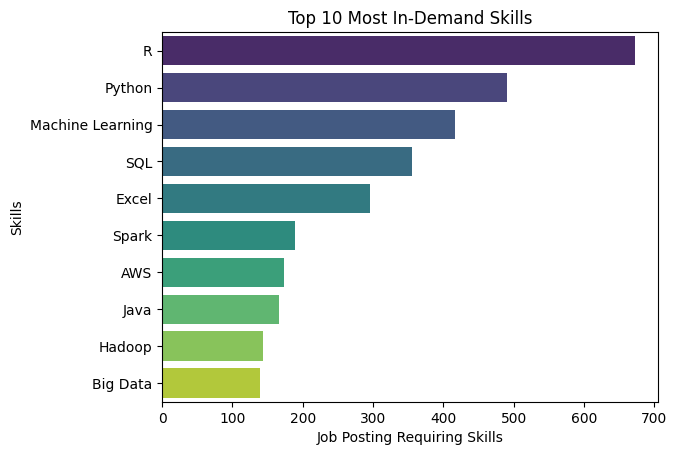

In [19]:
skills_series = df_transformed['Skills'].str.split(", ").explode()
top_skills = skills_series.value_counts().head(10)

plt.Figure(figsize=(10,5))
sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')
plt.xlabel("Job Posting Requiring Skills")
plt.ylabel("Skills")
plt.title("Top 10 Most In-Demand Skills")
plt.show()

C:\Users\Gamer\AppData\Local\Temp\ipykernel_1936\3096249143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")


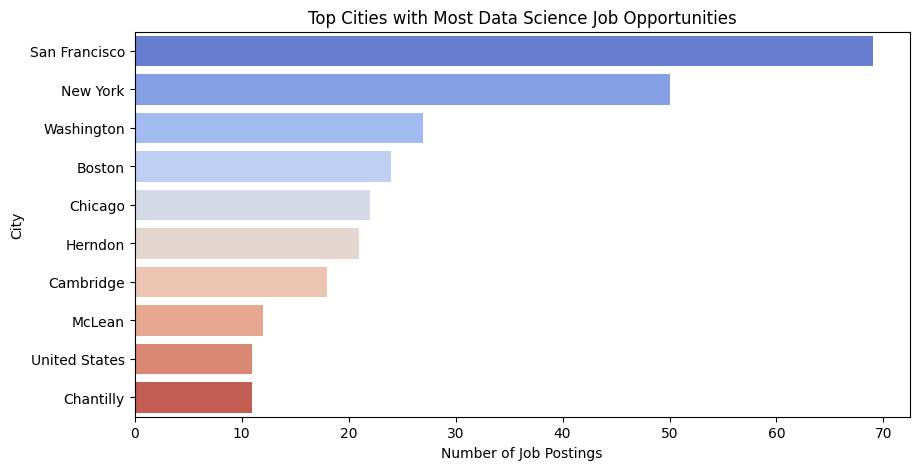

In [20]:
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")
plt.xlabel("Number of Job Postings")
plt.ylabel("City")
plt.title("Top Cities with Most Data Science Job Opportunities")
plt.show()


C:\Users\Gamer\AppData\Local\Temp\ipykernel_1936\3681093564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Number of Competitors"], y=df["Average Salary"], palette="coolwarm")


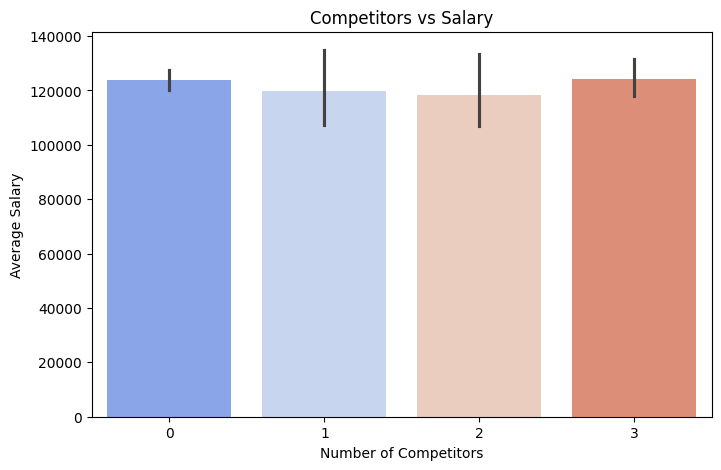

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x=df["Number of Competitors"], y=df["Average Salary"], palette="coolwarm")
plt.xlabel("Number of Competitors")
plt.ylabel("Average Salary")
plt.title("Competitors vs Salary")
plt.show()


C:\Users\Gamer\AppData\Local\Temp\ipykernel_1936\3592263907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


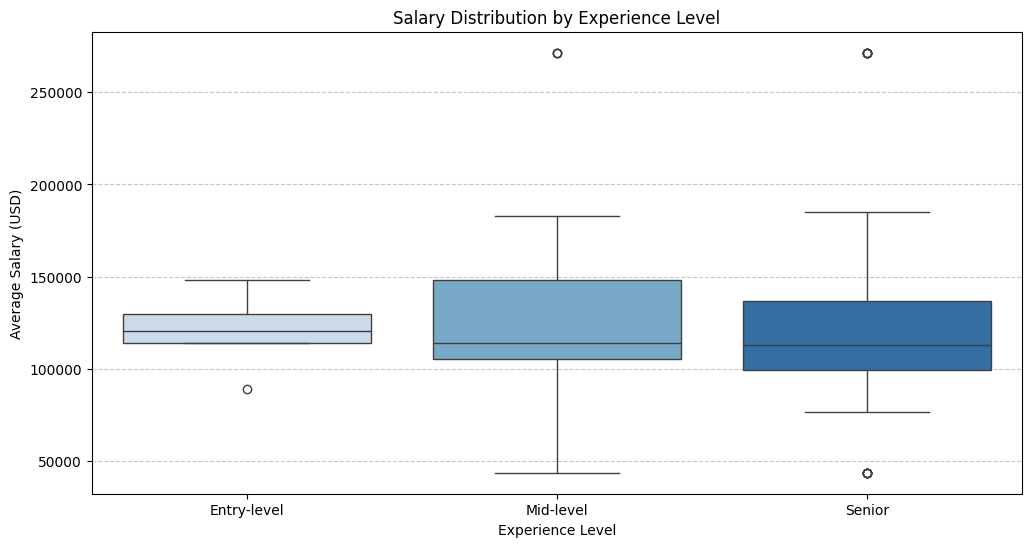

In [22]:
ordered_levels = ['Entry-level', 'Mid-level', 'Senior']

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_transformed,
    x='Experience',
    y='AverageSalary',
    order=ordered_levels,
    palette='Blues'
)

plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

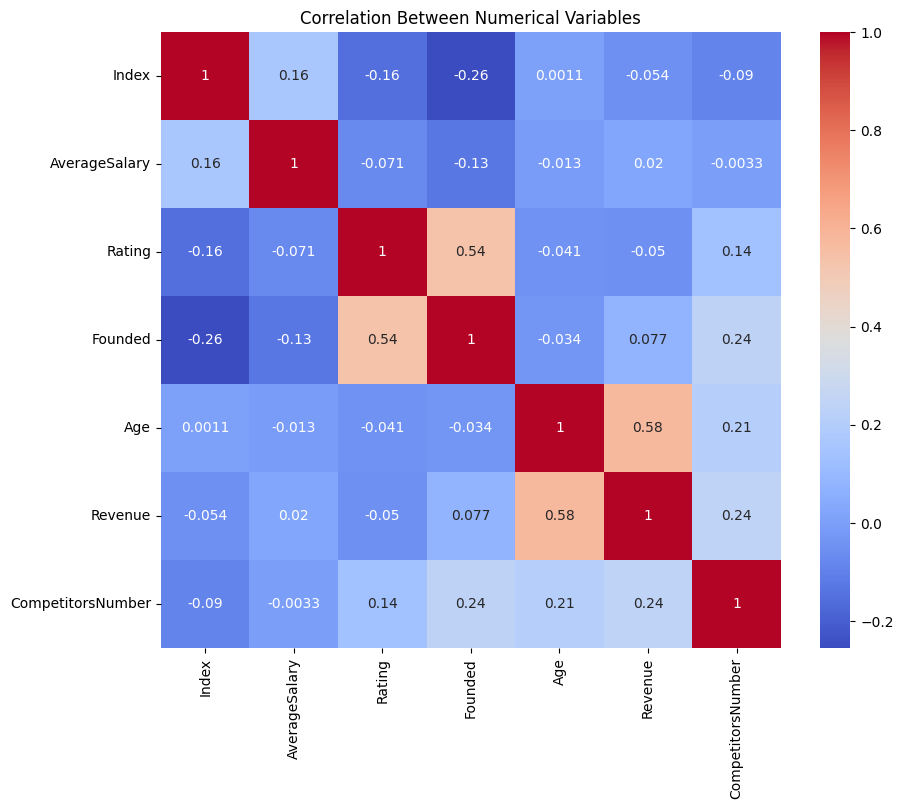

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_transformed.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Variables")
plt.show()

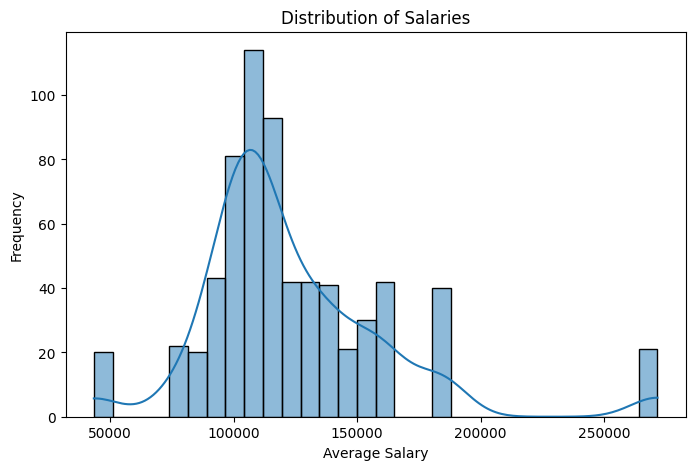

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df_transformed['AverageSalary'], kde=True, bins=30)
plt.title('Distribution of Salaries')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()